# Visualize Adam

>0 f([ 0.00920328 -0.52383379]) = 0.27449
>1 f([ 0.00857645 -0.50387873]) = 0.25397
>2 f([ 0.00084333 -0.48400039]) = 0.23426
>3 f([-0.00574371 -0.46423153]) = 0.21554
>4 f([-0.0062814 -0.4446056]) = 0.19771
>5 f([-0.00221234 -0.42515641]) = 0.18076
>6 f([ 0.0026265  -0.40591778]) = 0.16478
>7 f([ 0.00463513 -0.38692326]) = 0.14973
>8 f([ 0.00293345 -0.3682058 ]) = 0.13558
>9 f([-0.0005508  -0.34979747]) = 0.12236
>10 f([-0.00299992 -0.33172922]) = 0.11005
>11 f([-0.00274865 -0.31403063]) = 0.09862
>12 f([-0.0004609  -0.29672971]) = 0.08805
>13 f([ 0.00177489 -0.27985269]) = 0.07832
>14 f([ 0.00219242 -0.26342393]) = 0.06940
>15 f([ 0.00075683 -0.24746572]) = 0.06124
>16 f([-0.00104771 -0.23199823]) = 0.05382
>17 f([-0.00163517 -0.21703937]) = 0.04711
>18 f([-0.00069781 -0.20260476]) = 0.04105
>19 f([ 0.00068745 -0.18870769]) = 0.03561
>20 f([ 0.00119742 -0.17535904]) = 0.03075
>21 f([ 0.00050731 -0.16256732]) = 0.02643
>22 f([-0.0005348  -0.15033864]) = 0.02260
>23 f([-0.00087072 -0.1

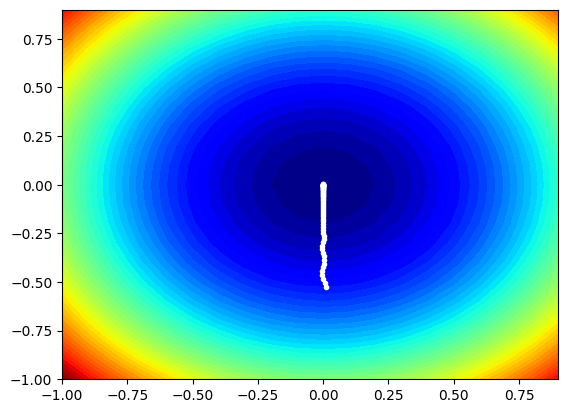

In [ ]:
# example of plotting the adam search on a contour plot of the test function
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 
# objective function
def objective(x, y):
 return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
 return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
 solutions = list()
 # generate an initial point
 x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 score = objective(x[0], x[1])
 # initialize first and second moments
 m = [0.0 for _ in range(bounds.shape[0])]
 v = [0.0 for _ in range(bounds.shape[0])]
 # run the gradient descent updates
 for t in range(n_iter):
 # calculate gradient g(t)
  g = derivative(x[0], x[1])
 # build a solution one variable at a time
  for i in range(bounds.shape[0]):
  # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
    m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
  # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
    v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
  # mhat(t) = m(t) / (1 - beta1(t))
    mhat = m[i] / (1.0 - beta1**(t+1))
  # vhat(t) = v(t) / (1 - beta2(t))
    vhat = v[i] / (1.0 - beta2**(t+1))
  # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
    x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
  # evaluate candidate point
  score = objective(x[0], x[1])
  # keep track of solutions
  solutions.append(x.copy())
 # report progress
  print('>%d f(%s) = %.5f' % (t, x, score))
 return solutions
 
# seed the pseudo random number generator
seed(50)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()